<div style="text-align:center; padding: 30px; background: linear-gradient(45deg, #cb202d, #ff4d4d); border-radius: 15px; color: #ffffff; box-shadow: 0 10px 20px rgba(0, 0.1, 0.2, 0.3);">
  <h1 style="font-family: 'Comicsans', cursive; font-size: 40px; font-weight: bold; letter-spacing: 2px; text-transform: uppercase; margin-bottom: 10px;">Zomato Data Analysis Project</h1>
</div>



<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h1 style="color: #cb202d;">Importing Libraries</h1>
</div>


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h1 style="color: #cb202d;">Creating DataFrame</h1>
</div>


In [2]:
df = pd.read_csv("zomato_data.csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
df

name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          Buffet  
3                            300          Buffet  
4                            600          Buffet  
..                           ...             ...  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  

[148 rows x 7 columns]

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h1 style="color: #cb202d;">Converting the Data Type of the Rate Column</h1>
</div>


In [4]:
def rateConversion(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate']=df['rate'].apply(rateConversion)
df.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 1 : What type of restaurants do the majority of customers order from ?</h3>
</div>


In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

Text(0.5, 0, 'Type of Restaurant')

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : Majority of customers order from Dining category restuarants</h3>
</div>


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 2 : How many votes has each type of restaurant received from customers ?</h3>
</div>


Text(0, 0.5, 'Votes')

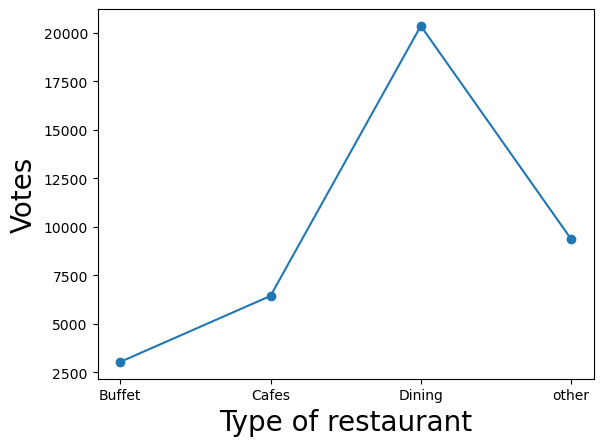

In [7]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result,marker = "o")
plt.xlabel("Type of restaurant",size=20)
plt.ylabel("Votes",size=20)

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : Dining restaurant have recieved maximum votes around 20000. Whereas Buffet restaurants have recieved around 2500 votes. And Cafes and other restaurants have recieved around 6000 and 9000 votes approximately</h3>
</div>


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 3: What are the ratings that the majority of restaurants have recieved?</h3>
</div>


In [8]:
plt.hist(df['rate'])
plt.title("Ratings Distribution")

Text(0.5, 1.0, 'Ratings Distribution')

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : The majority of restaurants have recieved ratings from 3.5 to 4</h3>
</div>


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 4 : Zomato has observed that most couples order most of their food online. What is their average spending on each order?</h3>
</div>


In [9]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : The majority of couples prefer restuarants with an approximate cost of 300 rupees</h3>
</div>


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 5 : Which mode (online or offline) has received the maximum rating ?</h3>
</div>


<Axes: xlabel='online_order', ylabel='rate'>

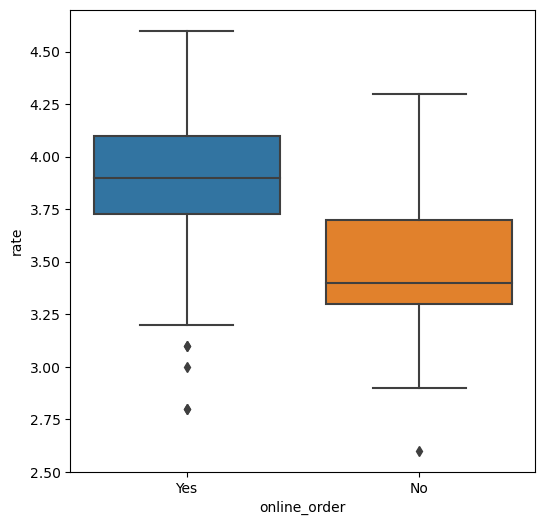

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : Online order received higher rating in comparison to offline order</h3>
</div>


<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Question - 6 : Which type of restaurant received more offline orders, so that Zomato can provide customers some good offers.</h3>
</div>


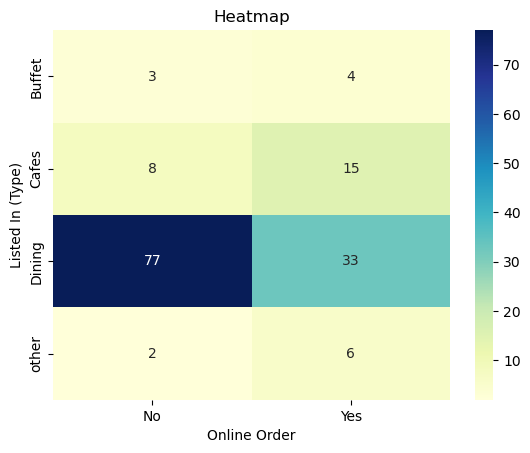

In [11]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

<div style="text-align:center; padding: 20px; background-color: #f9e5e5; border-radius: 10px; border: 2px solid #cb202d;">
  <h3 style="color: #cb202d;">Conclusion : Dining restaurants primarily accepts offline orders, whereas cafes primarily recieve online orders. This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes</h3>
</div>
